<a href="https://colab.research.google.com/github/pinilDissanayaka/Cat_Dog_Classification-Using-VGG19/blob/main/Cat_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/


In [3]:
! chmod 600 ~/.kaggle/kaggle.json


In [4]:
! kaggle datasets download tongpython/cat-and-dog

 95% 206M/218M [00:01<00:00, 180MB/s]
100% 218M/218M [00:01<00:00, 156MB/s]


In [5]:
! unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [33]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

In [7]:
IMG_SIZE = [224, 224, 3]

train_path = '/content/training_set/training_set'
test_path = '/content/test_set/test_set'

In [8]:
vgg = VGG19(include_top = False, input_shape = IMG_SIZE, weights = 'imagenet')

80134624/80134624 [==============================] - 0s 0us/step


In [9]:
for i in vgg.layers:
  i.trainable = False

In [10]:
folders = glob("/content/training_set/training_set/*")

print(folders)

['/content/training_set/training_set/cats', '/content/training_set/training_set/dogs']


In [11]:
x = Flatten()(vgg.output)

prediction = Dense(units = len(folders), activation = 'softmax')(x)

model = Model(inputs = vgg.input, outputs = prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_data_gen = ImageDataGenerator(rescale = 1./255)

In [15]:
train_set = train_data_gen.flow_from_directory(train_path, target_size = (224, 224), batch_size = 40, class_mode = 'categorical')

test_set = train_data_gen.flow_from_directory(test_path, target_size = (224, 224), batch_size = 40, class_mode = 'categorical')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [16]:
history = model.fit_generator(train_set, validation_data = test_set, epochs = 5, steps_per_epoch = len(train_set), validation_steps = len(test_set))

Epoch 1/5
201/201 [==============================] - 156s 706ms/step - loss: 0.3773 - accuracy: 0.8405 - val_loss: 0.3015 - val_accuracy: 0.8744
Epoch 2/5
201/201 [==============================] - 138s 686ms/step - loss: 0.2502 - accuracy: 0.8932 - val_loss: 0.2437 - val_accuracy: 0.9031
Epoch 3/5
201/201 [==============================] - 140s 695ms/step - loss: 0.2449 - accuracy: 0.8989 - val_loss: 0.4215 - val_accuracy: 0.8443
Epoch 4/5
201/201 [==============================] - 140s 696ms/step - loss: 0.2143 - accuracy: 0.9141 - val_loss: 0.2564 - val_accuracy: 0.8997
Epoch 5/5
201/201 [==============================] - 139s 690ms/step - loss: 0.1982 - accuracy: 0.9220 - val_loss: 0.2828 - val_accuracy: 0.8942


It gives 92.2% accuracy with train data and 89.4% accuracy with validation data.

In [19]:
test_score = model.evaluate(test_set)

51/51 [==============================] - 28s 540ms/step - loss: 0.2888 - accuracy: 0.8977


In [20]:
test_score

[0.2888221740722656, 0.8976767063140869]

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

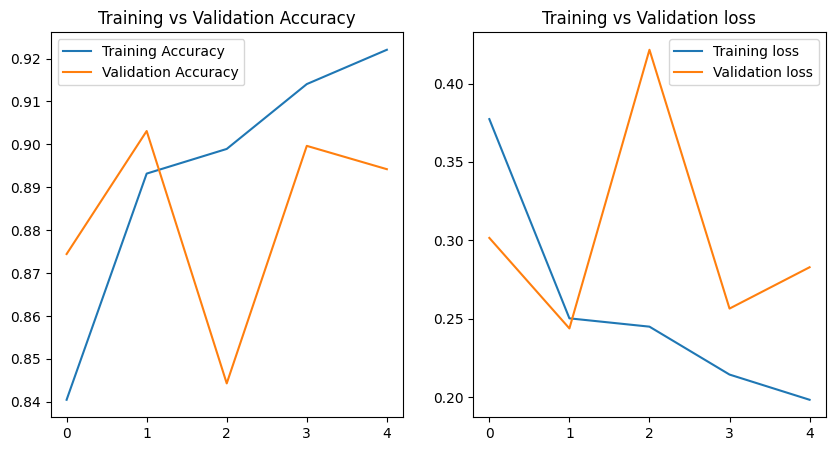

In [32]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(5), history.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(5), history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(5), history.history['loss'], label = 'Training loss')
plt.plot(range(5), history.history['val_loss'], label = 'Validation loss')
plt.legend()
plt.title('Training vs Validation loss')

plt.show()